# XGBoost

Inicialmente, utilizando XGBoost com as variáveis selecionadas durante a análise exploratória.

In [89]:
import xgboost as xgb
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, RepeatedKFold, train_test_split
import matplotlib.pyplot as plt

%store -r dataset_modelo
%store -r X_train
%store -r X_val
%store -r Y_train
%store -r Y_val

In [90]:
# Separando regressoras da variável resposta 
X, y = dataset_modelo.iloc[:,:-1],dataset_modelo.iloc[:,-1]

#Utilizando formato interpretável para o modelo de XGBoost
data_dmatrix = xgb.DMatrix(data=X,label=y)


Abaixo, modelo treinado utilizando Cross Validation.

In [91]:
data_dmatrix = xgb.DMatrix(data=X_train,label=Y_train)
params = {'objective':'reg:squarederror',
          'subsample':0.99,
         'max_depth':3,
          'min_child_weight':8,
         'learning_rate':.9
        }
xgb_cv = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5, metrics = 'mae',seed=42)

xgb_cv

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,895.524104,4.205981,902.313529,33.510338
1,667.632848,8.361830,701.323308,27.034207
2,634.319670,6.630058,661.892668,24.524400
3,623.620999,7.746861,656.434465,26.293090
4,612.064280,12.440766,648.170469,16.353979
5,603.891582,12.329200,643.850213,16.384898
6,597.706894,13.910373,641.011664,19.759765
7,591.775599,11.874831,641.783836,19.490525
8,582.820673,4.130151,636.702368,25.945253
9,578.648154,3.709871,635.355471,28.050138


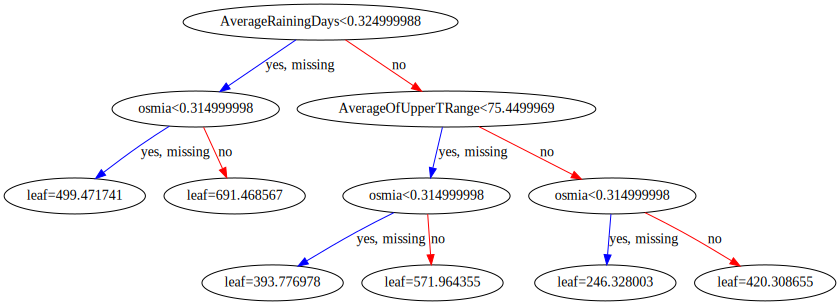

In [92]:
xg_reg = xgb.XGBRegressor(eval_metric=mean_absolute_error,
        n_estimators = 100,
        subsample = 0.8,
        min_child_weight=5,
        max_depth=3,
        learning_rate=.1)
        
xg_reg.fit(X_train, Y_train)
xgb.to_graphviz(xg_reg, num_trees=0)

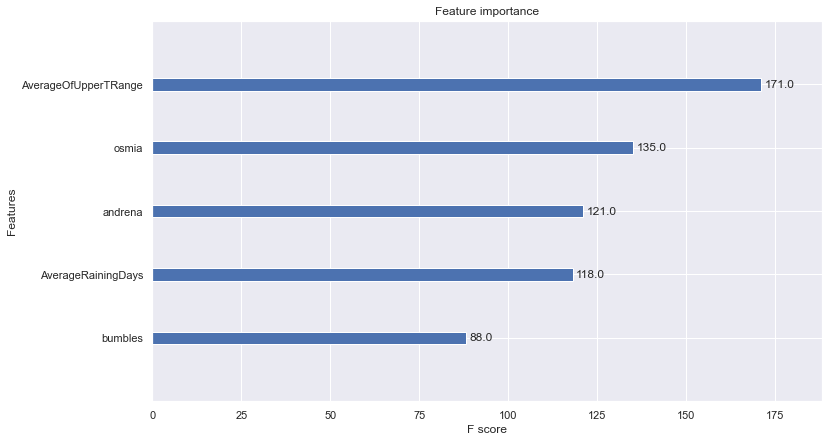

In [93]:
sns.set_theme()
sns.set(rc={"figure.figsize": [12, 7]})

#Importância de cada Feature
xgb.plot_importance(xg_reg);

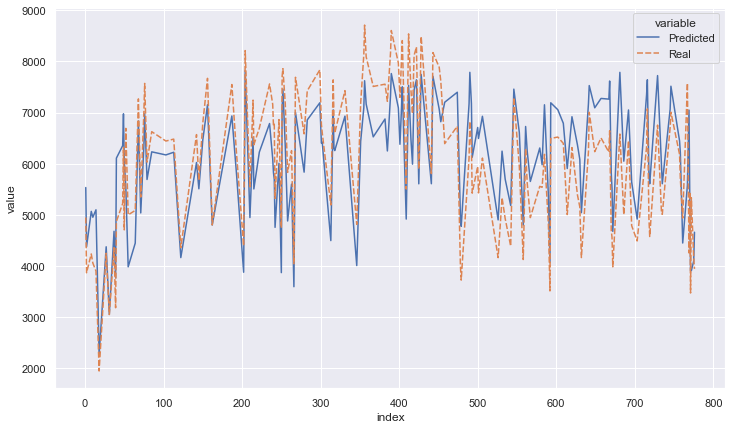

In [94]:
preds = xg_reg.predict(X_val)

finald = { "Predicted" : preds, "Real": Y_val}

plotdata = pd.DataFrame(finald)

df_melted = plotdata.reset_index().melt(id_vars='index')

sns.lineplot(data = df_melted, x = "index", y = "value", style = "variable", hue = "variable");

Também podemos medir o percentual do erro absoluto.

In [96]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

prct_error = mean_absolute_percentage_error(y_true = Y_val, y_pred = preds)

prct_error

12.48080344532178